## Setting up parallel training on N GPU/CPU

In [1]:
#!g1.2
import sys

import torch
import torch.multiprocessing as mp

In [2]:
#!g1.2
sys.path.append('/home/jupyter/work/resources/')

In [3]:
#!g1.2
from processingDataSet import MaskDataset, PreprocessingData, get_not_RGB_pic

In [4]:
#!g1.2 invalid load key, '\x04'.
random_state = 10

In [5]:
#!g1.2
data_path = '/home/jupyter/mnt/datasets/Segmentation/Training'
prData = PreprocessingData()
train_data, val_data = prData.get_data(data_path, random_state)

In [6]:
#!g1.2
print('Train data size: ', len(train_data), 'Validation data size: ', len(val_data))

Train data size:  84999 Validation data size:  4474


In [7]:
#!g1.2
import pandas as pd

In [13]:
#!g1.2
frame = pd.read_csv('open_time.csv')

In [14]:
#!g1.2
frame.dropna(inplace = True)

In [15]:
#!g1.2
frame.drop('Unnamed: 0',axis = 1, inplace = True)

In [8]:
#!g1.2
import matplotlib.pyplot as plt

In [26]:
#!g1.2
frame.reset_index(inplace = True)

In [28]:
#!g1.2
frame.drop('index',axis = 1, inplace = True)

In [29]:
#!g1.2
frame

,device:,time:,id:
0,cuda:0,0.003815,0
1,cuda:0,0.003534,4
2,cuda:0,0.004119,1
3,cuda:0,0.005191,7
4,cuda:0,0.004180,3
...,...,...,...
15268,cuda:1,0.042325,3
15269,cuda:1,0.033720,5
15270,cuda:1,0.006322,4
15271,cuda:1,0.007717,3


In [17]:
#!g1.2
frame['time:'] = frame['time:'].astype(float)

<Axes: >

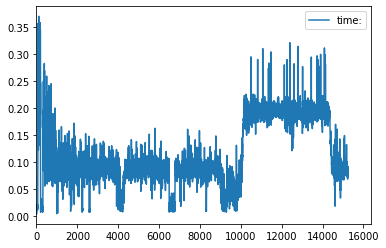

In [51]:
#!g1.2
frame[frame['device:'] == 'cuda:0'].plot(xlim = (0, 16384))

<Axes: >

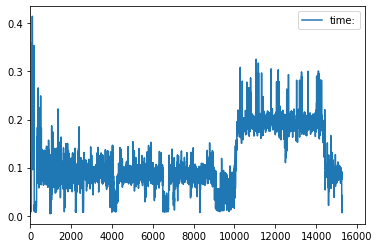

In [52]:
#!g1.2
frame[frame['device:'] == 'cuda:1'].plot(xlim = (0, 16384))

In [54]:
#!g1.2
frame1['time:'][:16384].mean()

0.023754806010401808

In [56]:
#!g1.2
frame1['time:'].mean()

0.024437813457232383

In [53]:
#!g1.2
frame['time:'][:16384].mean()

0.11461426722685715

In [9]:
#!g1.2
frame1 = pd.read_csv('open_time1.csv')
frame1.dropna(inplace = True)
frame1.drop('Unnamed: 0',axis = 1, inplace = True)
frame1['time:'] = frame1['time:'].astype(float)
frame1.reset_index(inplace = True)
frame1.drop('index',axis = 1, inplace = True)

In [ ]:
#!g1.2
frame1[frame1['device:'] == 'cuda:0'].plot(xlim = (0, 16384))

<Axes: >

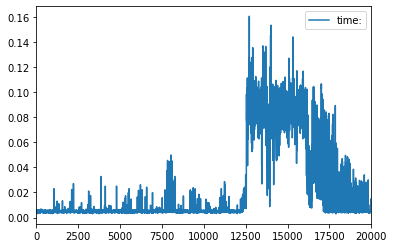

In [50]:
#!g1.2
frame1[frame1['device:'] == 'cuda:1'].plot( xlim = (0, 16384))

In [10]:
#!g1.2
frame2 = pd.read_csv('open_time2.csv')
frame2.dropna(inplace = True)
frame2.drop('Unnamed: 0',axis = 1, inplace = True)
frame2['time:'] = frame2['time:'].astype(float)
frame2.reset_index(inplace = True)
frame2.drop('index',axis = 1, inplace = True)

<Axes: >

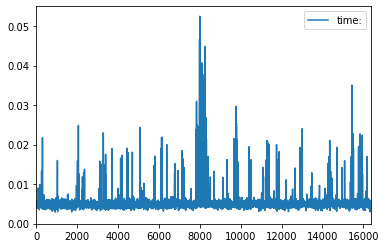

In [12]:
#!g1.2
frame2[frame2['device:'] == 'cuda:0'].plot(xlim = (0, 16384))

In [14]:
#!g1.2
frame2['time:'][:16384].mean()

0.005254598770989105

<Axes: >

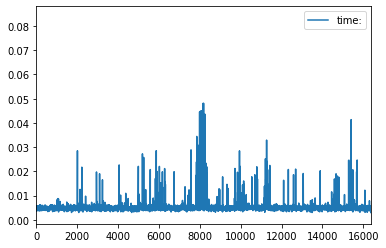

In [15]:
#!g1.2
frame2[frame2['device:'] == 'cuda:1'].plot(xlim = (0, 16384))

In [9]:
#!g1.2
frame3 = pd.read_csv('open_time3.csv')
frame3.dropna(inplace = True)
frame3.drop('Unnamed: 0',axis = 1, inplace = True)
frame3['time:'] = frame3['time:'].astype(float)
frame3.reset_index(inplace = True)
frame3.drop('index',axis = 1, inplace = True)

In [65]:
#!g1.2
import matplotlib.pyplot as plt

<Axes: >

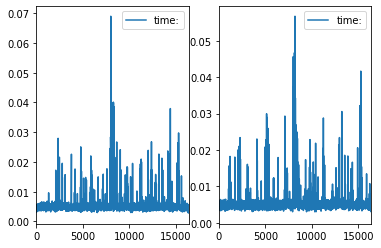

In [16]:
#!g1.2
figure, axis = plt.subplots(1, 2)
frame3[frame3['device:'] == 'cuda:0'].plot(xlim = (0, 16384), ax = axis[0])
frame3[frame3['device:'] == 'cuda:1'].plot(xlim = (0, 16384), ax = axis[1])

In [17]:
#!g1.2
frame3['time:'][:16384].mean()

0.005244698317255825

In [66]:
#!g1.2
frame00 = pd.read_csv('open_time00.csv')
frame00.dropna(inplace = True)
frame00.drop('Unnamed: 0',axis = 1, inplace = True)
frame00['time:'] = frame00['time:'].astype(float)
frame00.reset_index(inplace = True)
frame00.drop('index',axis = 1, inplace = True)

<Axes: >

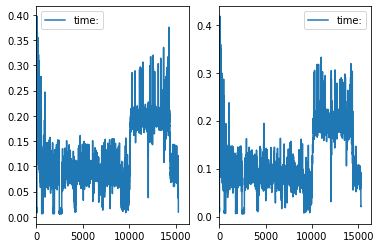

In [68]:
#!g1.2
figure, axis = plt.subplots(1, 2)
frame00[frame00['device:'] == 'cuda:0'].plot(xlim = (0, 16384), ax = axis[0])
frame00[frame00['device:'] == 'cuda:1'].plot(xlim = (0, 16384), ax = axis[1])

In [69]:
#!g1.2
frame00['time:'][:16384].mean()

0.1164794612929459

<Axes: >

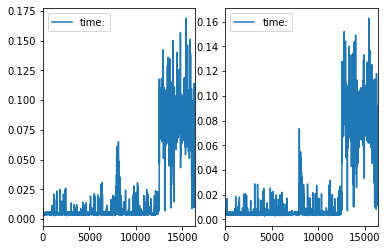

In [10]:
#!g1.2
frame01 = pd.read_csv('open_time01.csv')
frame01.dropna(inplace = True)
frame01.drop('Unnamed: 0',axis = 1, inplace = True)
frame01['time:'] = frame01['time:'].astype(float)
frame01.reset_index(inplace = True)
frame01.drop('index',axis = 1, inplace = True)
figure, axis = plt.subplots(1, 2)
frame01[frame01['device:'] == 'cuda:0'].plot(xlim = (0, 16384), ax = axis[0])
frame01[frame01['device:'] == 'cuda:1'].plot(xlim = (0, 16384), ax = axis[1])

In [11]:
#!g1.2
frame01['time:'][:16384].mean()

0.02371437866531778

In [8]:
#!g1.2
!free -g

               total        used        free      shared  buff/cache   available
Mem:              94           2          86           0           5          91
Swap:              0           0           0


In [ ]:
#!g1.2
from distLearningFunc import worker

world_size = 2  # Number of GPU
batch_size = 64
seed = random_state
epochs = 1

mp.spawn(worker, args = (world_size, train_data, val_data, batch_size, seed, epochs, '2024_02_02_17_18_49.pt'),
         nprocs = world_size)

In [8]:
#!g1.2 #noqa
'''
    Warning from torch.multiprossesing.spawn:

    If the main process exits abruptly (e.g. because of an incoming signal),
    Python’s multiprocessing sometimes fails to clean up its children.
    It’s a known caveat, so if you’re seeing any resource leaks after interrupting the interpreter,
    it probably means that this has just happened to you.
    https://pytorch.org/docs/stable/multiprocessing.html
'''
# To fix that problem, find the PID of this proсess(es)
# (depends on how many workers were started) and kill them.
!ps -fe | grep multiprocessing.spawn

jupyter     6466    2421  0 13:59 ?        00:00:00 /bin/sh -c          pip () {             echo 'pip is disabled in bash. Please use %pip magic.' >&2             exit 1         }         pip3 () {             pip         }          ps -fe | grep multiprocessing.spawn 
jupyter     6468    6466  0 13:59 ?        00:00:00 grep multiprocessing.spawn


In [ ]:
#!g1.2 #noqa
!kill 4159

In [ ]:
#!g1.2
!ls ./models/checkpoints

In [ ]:
trained_state_dict = torch.load('/home/jupyter/datasphere/project/figureExtraction/train_checkpoints/2024_02_02_17_18_49.pt', map_location=torch.device('cpu'))

In [ ]:
#!g1.2
trained_state_dict.keys()

In [ ]:
#!g1.2
from SegNetModel import SegNet
model_trained = SegNet()
model_trained.load_state_dict(trained_state_dict['model_state_dict'])

In [ ]:
#!g1.2
test_set = MaskDataset(data_path, val_data)

In [ ]:
#!g1.2
from torchvision import io

In [ ]:
from torchvision import transforms
img_path = '/home/jupyter/work/resources/figureExtraction/datasets/segNet/input/231.jpg'
mask_path = '/home/jupyter/work/resources/figureExtraction/datasets/segNet/Output/231.png'
image = io.read_image(img_path)
mask = io.read_image(mask_path)
norm = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
to_resized_tensor = transforms.Compose([
            transforms.Resize([224, 224], antialias=True)])
image = norm(to_resized_tensor(image).div(255))
mask = to_resized_tensor(mask).div(255)

In [ ]:
#!g1.2
#y = model_trained(test_set[0][0].unsqueeze(0))
y = model_trained(image.unsqueeze(0))

In [ ]:
#!g1.2
from matplotlib import pyplot as plt

In [ ]:
#!g1.2
y.shape

In [ ]:
#!g1.2
import numpy as np
def conv_to_img(tensor: torch.tensor) -> np.array:
    """Convert image to display by pyplot."""
    img = tensor.to('cpu').clone().detach()
    img = img.numpy().squeeze()
    img = img.clip(0, 1)
    return img

In [ ]:
#!g1.2
res = conv_to_img(y)

In [ ]:
#!g1.2
def conv_to_img1(tensor: torch.tensor) -> np.array:
    """Convert image to display by pyplot."""
    img = tensor.to('cpu').clone().detach()
    img = img.numpy().squeeze()
    img = img.transpose(1, 2, 0)
    img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    img = img.clip(0, 1)
    return img

In [ ]:
#!g1.2
test_set[1][0].shape

In [ ]:
#!g1.2
plt.imshow(conv_to_img1(image))

In [ ]:
#!g1.2
plt.imshow(res)

In [ ]:
#!g1.2


In [ ]:
#!g1.2
plt.imshow(conv_to_img(mask))